# Time Series From Scratch (part. 6) — Stationarity Tests and Automation (Dario Radečić)
[Source](https://towardsdatascience.com/time-series-from-scratch-stationarity-tests-and-automation-14b02fa5ca4d). From [Time Series From Scratch](https://towardsdatascience.com/tagged/time-series-from-scratch).

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [2]:
%load_ext watermark

In [3]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.grid'] = True
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

In [4]:
# from tqdm import tqdm

# from glob import glob

# import matplotlib.pyplot as plt
# %matplotlib inline
# from IPython.core.pylabtools import figsize
# figsize(12, 8)

# import seaborn as sns
# sns.set_theme()

# pd.set_option("max_columns", None)
# pd.set_option("max_rows", None)
# pd.set_option('display.max_colwidth', None)

# from IPython.display import Markdown, display
# def md(arg):
#     display(Markdown(arg))

# from pandas_profiling import ProfileReport
# #report = ProfileReport(#DataFrame here#, minimal=True)
# #report.to

# import pyarrow.parquet as pq
# #df = pq.ParquetDataset(path_to_folder_with_parquets, filesystem=None).read_pandas().to_pandas()

# import json
# def open_file_json(path,mode='r',var=None):
#     if mode == 'w':
#         with open(path,'w') as f:
#             json.dump(var, f)
#     if mode == 'r':
#         with open(path,'r') as f:
#             return json.load(f)

# import functools
# import operator
# def flat(a):
#     return functools.reduce(operator.iconcat, a, [])

# import json
# from glob import glob
# from typing import NewType


# DictsPathType = NewType("DictsPath", str)


# def open_file_json(path):
#     with open(path, "r") as f:
#         return json.load(f)

# class LoadDicts:
#     def __init__(self, dict_path: DictsPathType = "./data"):
#         Dicts_glob = glob(f"{dict_path}/*.json")
#         self.List = []
#         self.Dict = {}
#         for path_json in Dicts_glob:
#             name = path_json.split("/")[-1].replace(".json", "")
#             self.List.append(name)
#             self.Dict[name] = open_file_json(path_json)
#             setattr(self, name, self.Dict[name])


In [5]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v
!cat /proc/cpuinfo |grep 'model name'|head -n 1 |sed -e 's/model\ name/CPU/'
!free -h |cut -d'i' -f1  |grep -v total

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 7.25.0

Compiler    : GCC 8.3.0
OS          : Linux
Release     : 5.11.0-7620-generic
Machine     : x86_64
Processor   : 
CPU cores   : 4
Architecture: 64bit

Git hash: 9a8e0abd51d6ec324820b030d48bb0ca40dc8bb6

Git repo: https://github.com/ysraell/forecasting.git

Git branch: main

matplotlib: 3.4.2
numpy     : 1.19.5
pandas    : 1.3.1

CPU	: Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz
Mem:           15G
Swap:         4.0G


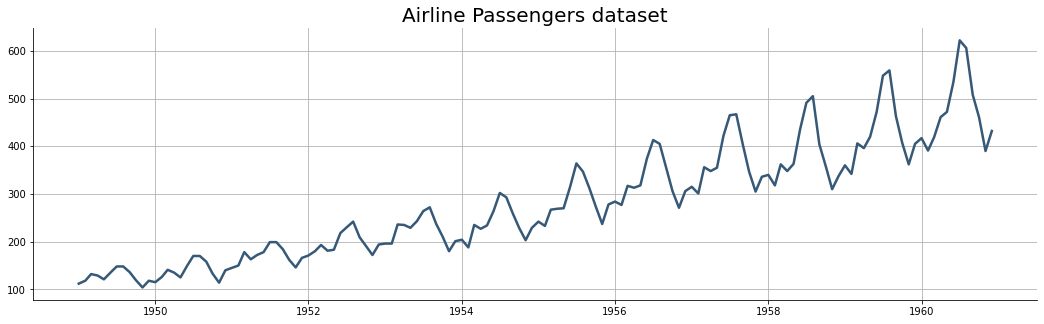

In [6]:
# Load
df = pd.read_csv('/work/tmp/airline-passengers.csv', index_col='Month', parse_dates=True)

# Visualize
plt.title('Airline Passengers dataset', size=20)
plt.plot(df);

In [7]:
# ADF stationarity test
# Returns: {Test statistic, P-value, Num lags used, {Critical values}, Estmation of maximized information criteria}
adfuller(df['Passengers'])

(0.8153688792060418,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [8]:
adfuller?

Signature:
adfuller(
    x,
    maxlag=None,
    regression='c',
    autolag='AIC',
    store=False,
    regresults=False,
)
Docstring:
Augmented Dickey-Fuller unit root test.

The Augmented Dickey-Fuller test can be used to test for a unit root in a
univariate process in the presence of serial correlation.

Parameters
----------
x : array_like, 1d
    The data series to test.
maxlag : int
    Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
regression : {"c","ct","ctt","nc"}
    Constant and trend order to include in regression.

    * "c" : constant only (default).
    * "ct" : constant and trend.
    * "ctt" : constant, and linear and quadratic trend.
    * "nc" : no constant, no trend.

autolag : {"AIC", "BIC", "t-stat", None}
    Method to use when automatically determining the lag length among the
    values 0, 1, ..., maxlag.

    * If "AIC" (default) or "BIC", then the number of lags is chosen
      to minimize the corresponding information criterion.
    * "

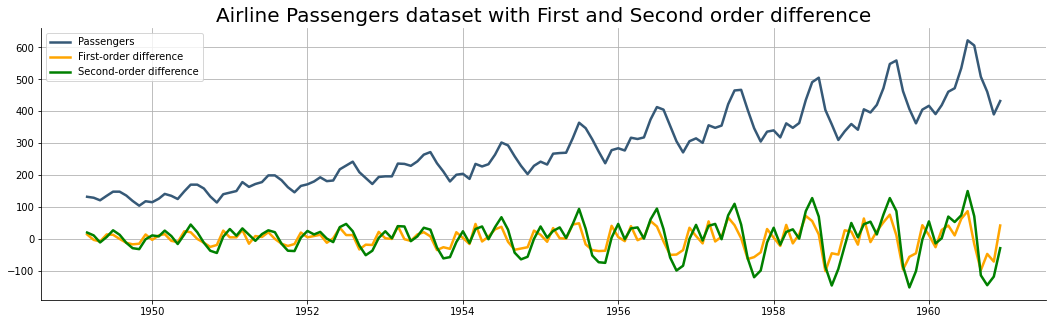

In [9]:
# First and second order difference
df['Passengers_Diff1'] = df['Passengers'].diff()
df['Passengers_Diff2'] = df['Passengers'].diff(2)

# Don't forget to drop missing values
df = df.dropna()

# Plot
plt.title('Airline Passengers dataset with First and Second order difference', size=20)
plt.plot(df['Passengers'], label='Passengers')
plt.plot(df['Passengers_Diff1'], label='First-order difference', color='orange')
plt.plot(df['Passengers_Diff2'], label='Second-order difference', color='green')
plt.legend();

In [10]:
# Perform ADF test
adf = adfuller(df['Passengers'])
adf_diff_1 = adfuller(df['Passengers_Diff1'])
adf_diff_2 = adfuller(df['Passengers_Diff2'])

# Extract P-values
p = adf[1]
p_1 = adf_diff_1[1]
p_2 = adf_diff_2[1]

# Print
print(f'P-value for original series: {np.round(p, 5)}')
print(f'P-value for 1st order difference: {np.round(p_1, 5)}')
print(f'P-value for 2nd order difference: {np.round(p_2, 5)}')

P-value for original series: 0.99069
P-value for 1st order difference: 0.05366
P-value for 2nd order difference: 0.03863


In [15]:
def make_stationary(data: pd.Series, alpha: float = 0.05, max_diff_order: int = 10) -> dict:
    # Test to see if the time series is already stationary
    if adfuller(data)[1] < alpha:
        return {
            'differencing_order': 0,
            'time_series': np.array(data)
        }
    
    # A list to store P-Values
    p_values = []
    
    # Test for differencing orders from 1 to max_diff_order (included)
    for i in range(1, max_diff_order + 1):
        # Perform ADF test
        result = adfuller(data.diff(i).dropna())
        # Append P-value
        p_values.append((i, result[1]))
        
    # Keep only those where P-value is lower than significance level
    significant = [p for p in p_values if p[1] < alpha]
    # Sort by the differencing order
    significant = sorted(significant, key=lambda x: x[0])
    
    # Get the differencing order
    diff_order = significant[0][0]
    
    # Make the time series stationary
    stationary_series = data.diff(diff_order).dropna()
    
    return {
        'differencing_order': diff_order,
        'time_series': np.array(stationary_series)
    }, p_values

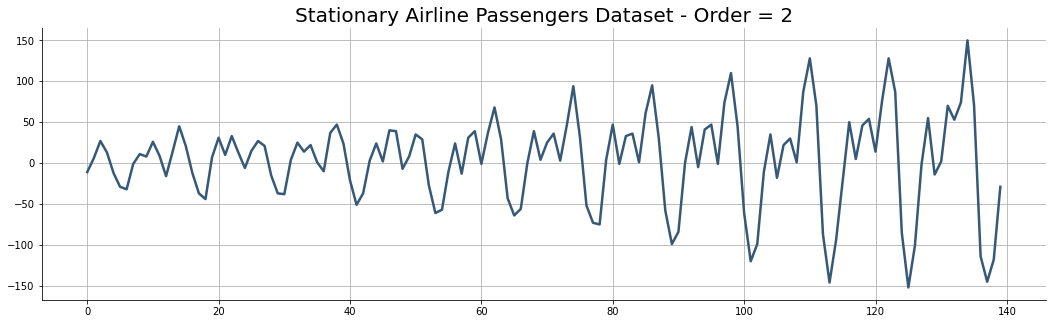

In [19]:
ap_stationary, p_values = make_stationary(
    data=df['Passengers'],
    alpha = 0.041
)

plt.title(f"Stationary Airline Passengers Dataset - Order = {ap_stationary['differencing_order']}", size=20)
plt.plot(ap_stationary['time_series']);

In [17]:
p_values

[(1, 0.047904831845561505),
 (2, 0.033782793670327695),
 (3, 0.04179428432682344),
 (4, 0.028420895410107172),
 (5, 0.016994195998182835),
 (6, 0.018467917516269222),
 (7, 0.008820926706415376),
 (8, 0.0056918353995431365),
 (9, 0.014884107154312704),
 (10, 0.006274654649539991)]